In [2]:
from os import listdir
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from nltk.classify import NaiveBayesClassifier

In [3]:
#########################
## PARSE TRAINING DATA ##
#########################
import string 

dataset =  { "sentence" : [] , "label" : [] }

def add_file(file, dataset, isPos):
    base = "test/" 
    if isPos == 'pos':
        base += "pos/"
    else:
        base += "neg/"
    with open(base + file, 'r') as myfile:
        data = myfile.read()
        dataset["sentence"].append(data)
        dataset["label"].append(isPos)
    return dataset

for pos_file in listdir("test/pos"):
    dataset = add_file(pos_file, dataset, 'pos')

for pos_file in listdir("test/neg"):
    dataset = add_file(pos_file, dataset, 'neg')

train_data = pd.DataFrame(dataset)
train_data




,label,sentence
0,pos,I went and saw this movie last night after bei...
1,pos,Actor turned director Bill Paxton follows up h...
2,pos,As a recreational golfer with some knowledge o...
3,pos,"I saw this film in a sneak preview, and it is ..."
4,pos,Bill Paxton has taken the true story of the 19...
5,pos,"I saw this film on September 1st, 2005 in Indi..."
6,pos,"Maybe I'm reading into this too much, but I wo..."
7,pos,I felt this film did have many good qualities....
8,pos,This movie is amazing because the fact that th...
9,pos,"""Quitting"" may be as much about exiting a pre-..."


In [39]:
###################################################
##      CLEAN DATA FOR BAG OF WORDS APPROACH     ##
###################################################
from nltk import sentiment 
from nltk.corpus import wordnet
import re

stopwords_set = set(stopwords.words("english"))
words_train_data = [] # remove stop words and get bag of words with sentiment
all_words = [] # get list of all words to extract features for classifier
neg_feats = []
pos_feats = []

# Remove short words, stop words
def word_feats(sentence):
    sentence = re.sub('([.,!?()])', r' \1 ', sentence)
    tokens = sentence.split()
    almost_words = sentiment.util.mark_negation(tokens)
    words = []
    for word in almost_words:
        try:
            word = word.encode('utf-8')
            words.append(word)
        except UnicodeDecodeError:
            continue
    return dict([(word.lower(), True) for word in words if len(word)>=3 and not any(char.isdigit() for char in word) and not word in stopwords_set and wordnet.synsets(word)])


for index, row in train_data.iterrows():
    sentence = row.sentence
    if row.label == 'pos':
        pos_feats.append((word_feats(sentence), 'pos'))
    else:
        neg_feats.append((word_feats(sentence), 'neg'))
        
split_where = int(min(len(neg_feats), len(pos_feats))*0.5) 

trainfeats = neg_feats + pos_feats
classifier = NaiveBayesClassifier.train(trainfeats)
print 'accuracy:', nltk.classify.util.accuracy(classifier, neg_feats[split_where:] + pos_feats[split_where:])
classifier.show_most_informative_features()

accuracy: 0.91224
Most Informative Features
                 dumbest = True              neg : pos    =     27.0 : 1.0
                 stinker = True              neg : pos    =     24.7 : 1.0
               god-awful = True              neg : pos    =     22.3 : 1.0
                  lugosi = True              neg : pos    =     21.7 : 1.0
                    boll = True              neg : pos    =     21.7 : 1.0
                    dirk = True              pos : neg    =     21.0 : 1.0
                 padding = True              neg : pos    =     17.7 : 1.0
              unexciting = True              neg : pos    =     17.0 : 1.0
                    turd = True              neg : pos    =     16.6 : 1.0
                   waste = True              neg : pos    =     16.4 : 1.0


In [24]:
test = "Divya is not terrible but she's not good."
print classifier.classify(word_feats(test))

pos


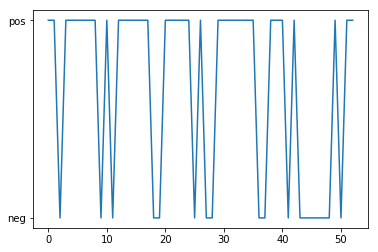

In [42]:
import matplotlib.pyplot as plt

###################################################
##      TEST WITH CINDERELLA CORPUS ONLINE       ##
###################################################

trial = {"sentence":[], "label":[]}
with open("cinderella.txt") as story:
    almost_there = story.readlines()
    for s in almost_there:
        s = s.encode('utf-8')
        if not s.isspace():
            trial["sentence"].extend(nltk.sent_tokenize(s))
    for sentence in trial["sentence"]:
        trial["label"].append(classifier.classify(word_feats(sentence)))
trial_data = pd.DataFrame(trial)
trial_data
plt.plot(trial_data["label"])
plt.show()


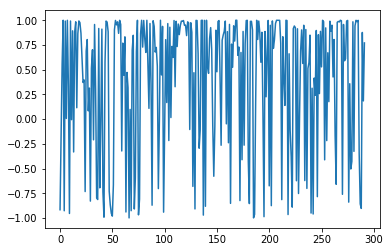

In [301]:
from textblob import TextBlob

###################################################
##      TEST WITH CINDERELLA CORPUS TEXTBLOB     ##
###################################################

trial = {"sentence":[], "label":[]}
with open("xmas_carol.txt") as story:
    # Read story and process all sentences as tokens
    full_story = story.readlines()
    all_sentences = []
    sentences = []
    for s in full_story:
        all_sentences.extend(nltk.sent_tokenize(s.strip().encode('utf-8')))
            
    # Split corpus into paragraphs by character count
    NUM_CHAR = 500
    index = 0
    while index < len(all_sentences):
        if sum(map(len, all_sentences[:index])) < NUM_CHAR:
            index += 1
            continue
        else:
            sentences.append(" ".join(all_sentences[:index]))
            all_sentences = all_sentences[index:]
            index = 0
    
    # Create dataset from sentences 
    for i in range(len(sentences)):
        s = sentences[i]
        if not s.isspace():
            trial["sentence"].append(s)
    for sentence in trial["sentence"]:
        trial["label"].append(classifier.prob_classify(word_feats(sentence)).prob("pos"))
        #info = TextBlob(sentence).sentiment
        #trial["label"].append(info.polarity)
        #trial["subj"].append(info.subjectivity)
        #print TextBlob(sentence).words
    trial["label"] = (np.array(trial["label"]) * 2) - 1 
    #trial["subj"] = (np.array(trial["subj"])/2) + 0.5
trial_data = pd.DataFrame(trial)
trial_data
plt.plot(trial_data["label"])
plt.show()


In [302]:

###################################################
##      SMOOTH DATA USING HANNING WINDOW         ##
###################################################

def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise ValueError, "smooth only accepts 1 dimension arrays."

    if x.size < window_len:
        raise ValueError, "Input vector needs to be bigger than window size."


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"


    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y

smoothed_data = smooth(np.array(trial["label"]), window_len=5, window='hanning')

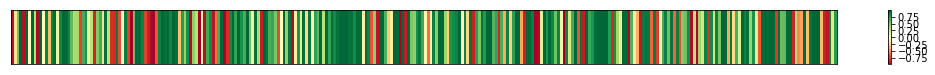

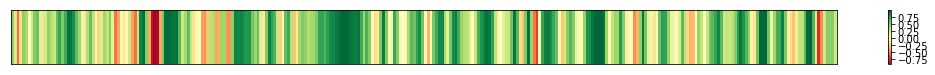

In [303]:
# Plot raw data of positivity 
fig = plt.figure()
fig.set_size_inches(18.5, 1)
plt.imshow([trial["label"]], aspect='auto', cmap = 'RdYlGn', extent=(0, len(trial["label"]), -2, 2))
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    left='off',
    labelleft='off',
    labelbottom='off') # labels along the bottom edge are off
plt.colorbar()
fig2 = plt.figure()
fig2.set_size_inches(18.5, 1)

# Scale based on subjectivity 
plt.imshow([smoothed_data], aspect='auto', cmap = 'RdYlGn', extent=(0, len(trial["label"]), -2, 2))
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    left='off',
    labelleft='off',
    labelbottom='off') # labels along the bottom edge are off
plt.colorbar()
plt.show()
#trial_data

In [278]:
trial_data

1.5